In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("New-Telco-Customer-churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replacing blanks with 0 as tenure is 0  and no total charges are recorded

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", 0)
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [20]:
df.isnull().sum().sum()

0

In [22]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [26]:
df.duplicated().sum()

0

In [28]:
df["customerID"].duplicated().sum()

0

#converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

In [80]:
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)        

In [64]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


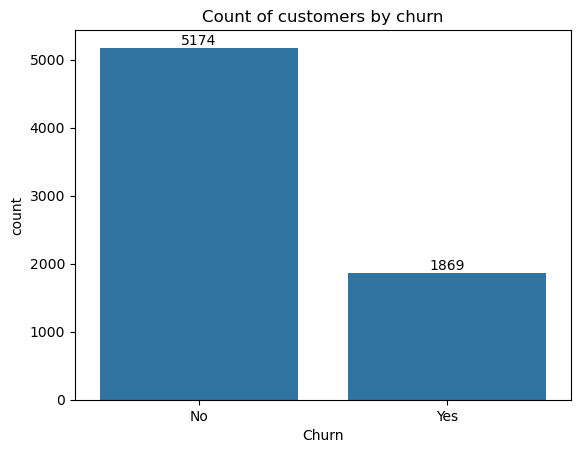

In [31]:
ax = sns.countplot(x = "Churn", data = df )
ax.bar_label(ax.containers[0])
plt.title("Count of customers by churn")
plt.show()

In [9]:
gb = df.groupby("Churn")
for key , value in gb:
    print("churn",key)
    print(value, "\n")

churn No
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
3     7795-CFOCW    Male              0      No         No      45   
6     1452-KIOVK    Male              0      No        Yes      22   
7     6713-OKOMC  Female              0      No         No      10   
...          ...     ...            ...     ...        ...     ...   
7037  2569-WGERO  Female              0      No         No      72   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
0              No  No phone service             DSL                  

In [11]:
gb = df.groupby("Churn").agg({"Churn":["count"]})
gb

,Churn
,count
Churn,
No,5174
Yes,1869


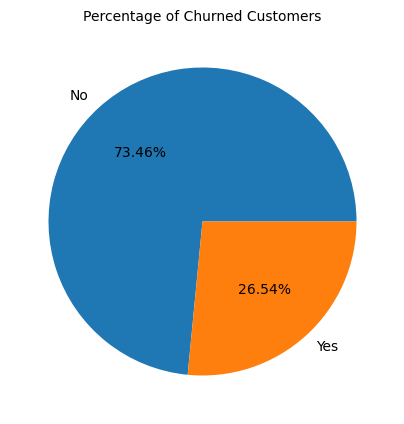

In [13]:
plt.figure(figsize = (5,5))
plt.pie(gb[("Churn", "count")], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize = 10)
plt.show()

#From the given pie chart we can conclude that 26.54% of our customers have churned out
#Now Let's explore the reason behind it

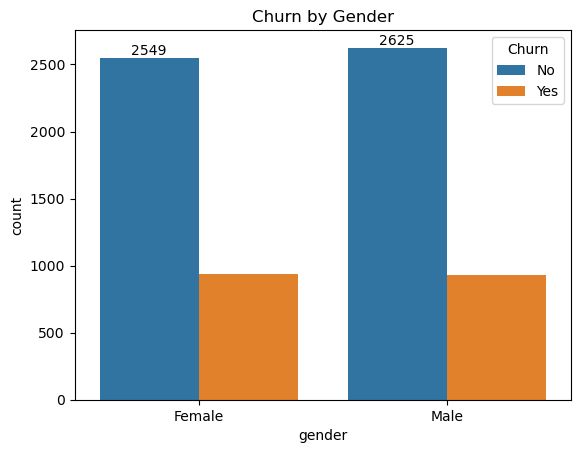

In [54]:
ax = sns.countplot(x = "gender", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Churn by Gender")
plt.show()

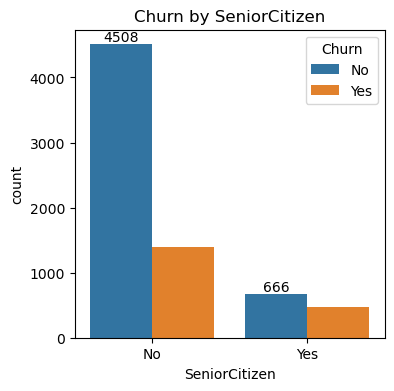

In [90]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "SeniorCitizen", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Churn by SeniorCitizen")
plt.show()

->Senior citizens ("Yes") have a higher churn rate — their “Yes” bar is taller than for non-seniors.
->Non-senior customers ("No") are less likely to churn — their “No” bar is much higher.

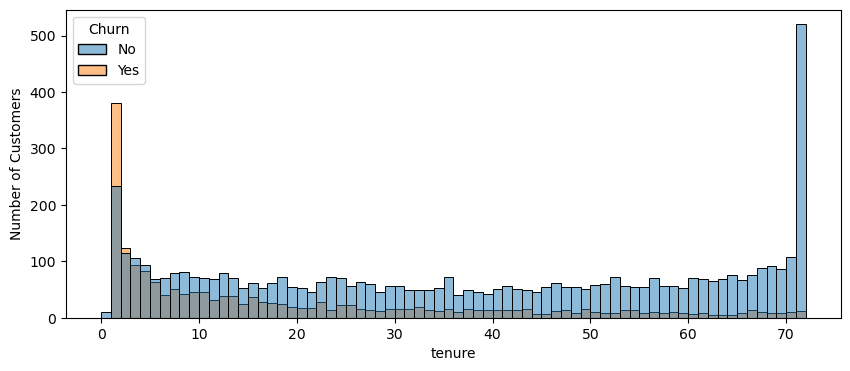

In [112]:
plt.figure(figsize = (10,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.ylabel("Number of Customers")
plt.show()

#What the chart shows

#The x-axis = how many months customers stayed (from 0 to 72 Tenure).

#The y-axis = how many customers stayed that long.

#The color (from hue="Churn") shows:

#One color = customers who left (Churn = Yes)

#Another color = customers who stayed (Churn = No)

This chart helps you see the pattern:

Many customers with low tenure (new customers) may have churned.

Customers who stayed for a long time are less likely to churn.



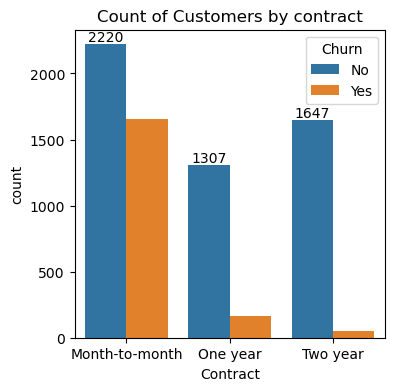

In [122]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by contract")
plt.show()

Customers with month-to-month contracts churn (leave) the most.
Customers with longer contracts (1 or 2 years) are more loyal and less likely to churn.

In [21]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [19]:
feature = ['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies']
list(enumerate(feature))

[(0, 'PhoneService'),
 (1, 'MultipleLines'),
 (2, 'InternetService'),
 (3, 'OnlineSecurity'),
 (4, 'OnlineBackup'),
 (5, 'DeviceProtection'),
 (6, 'TechSupport'),
 (7, 'StreamingTV'),
 (8, 'StreamingMovies')]

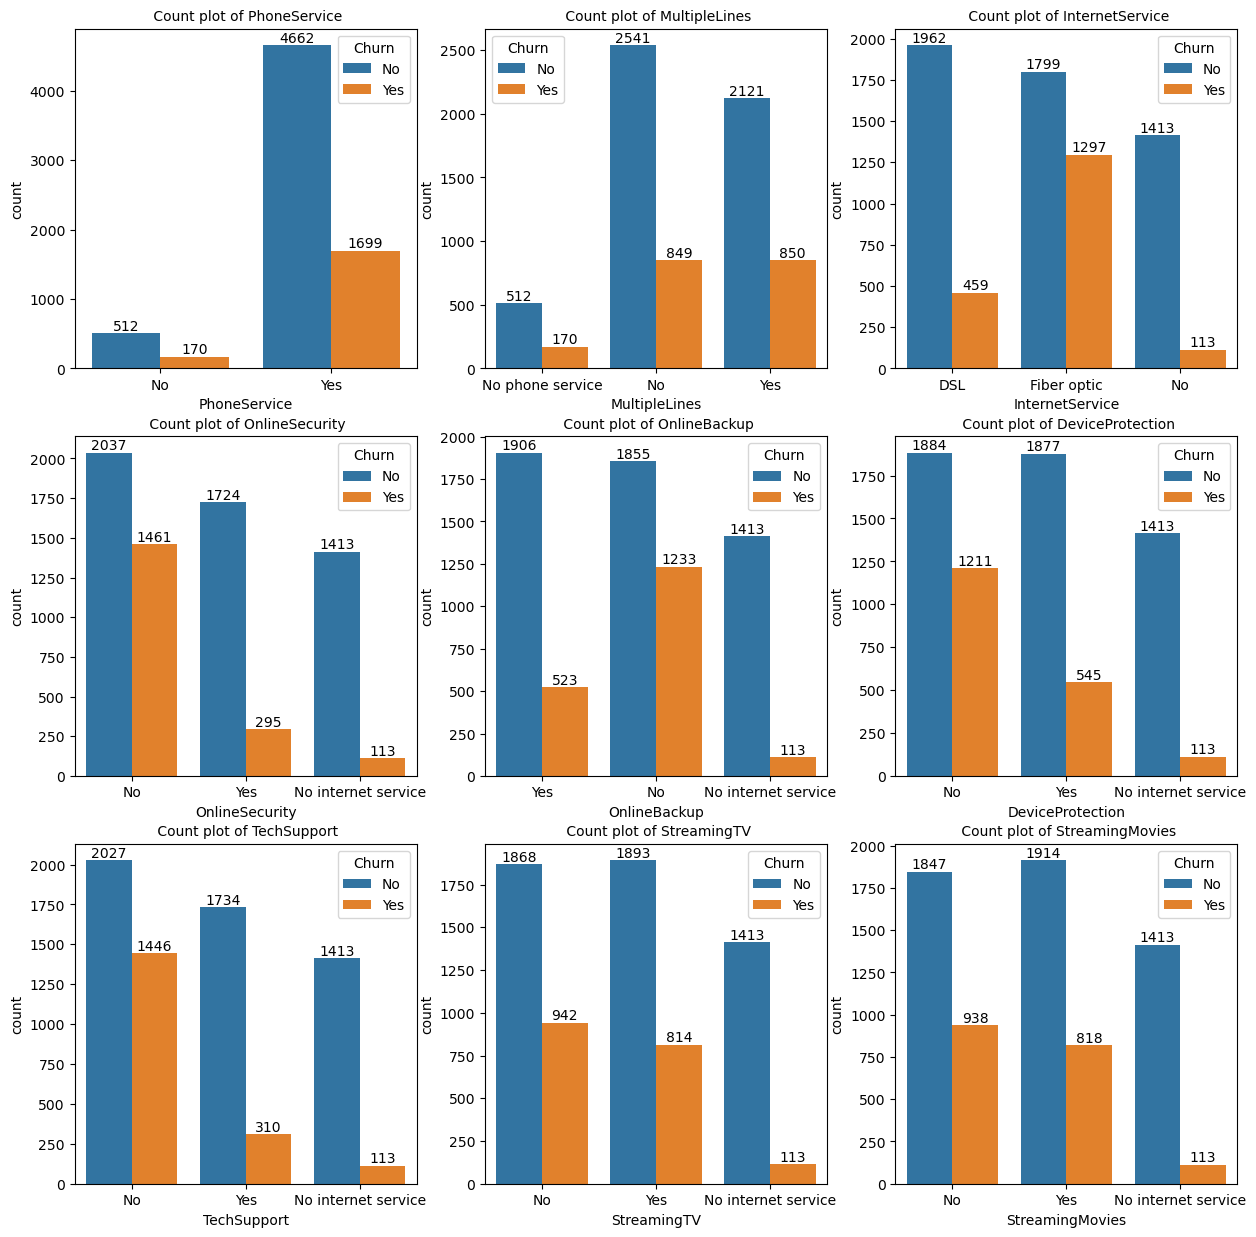

In [23]:
plt.figure(figsize = (15,15))
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    ax = sns.countplot(x = i[1], data = df , hue = "Churn")
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])

    plt.title(" Count plot of "+i[1], fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)   

1. PhoneService

Customers without phone service are very few.
Churn is almost equal for both Yes/No groups.

2. MultipleLines

Customers with multiple lines churn slightly more, but the difference is small.

3. InternetService

Fiber-optic users show the highest churn,
while DSL users churn less, and customers without internet churn the least.

4. OnlineSecurity

Customers without Online Security are far more likely to churn.

5. OnlineBackup

Churn is higher among customers who do not have Online Backup.

6. DeviceProtection

Customers without Device Protection tend to churn more.

7. TechSupport

Lack of Tech Support strongly correlates with higher churn.

8. StreamingTV

Streaming TV itself does not strongly affect churn — both groups churn similarly.

9. StreamingMovies

Same as StreamingTV — little difference in churn rate between Yes/No groups.

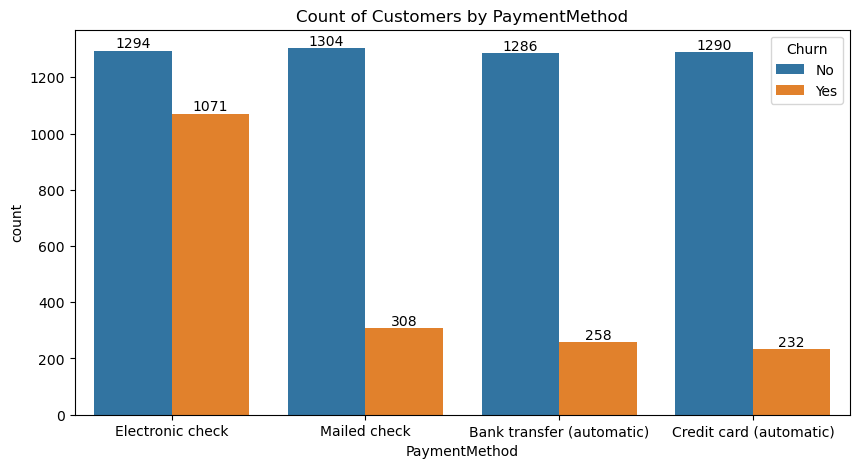

In [15]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Customers by PaymentMethod")
plt.show()

#Customer is likely to Churn when he is using electronic check as payment method